<a href="https://colab.research.google.com/github/guimaraess2/Artificial-Neural-Network/blob/master/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pwd

/content


In [0]:
cd sample_data/

/content/sample_data


**Importando as bibliotecas / Importing libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import tensorflow as tf
tf.__version__
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import ensemble
from sklearn.compose import ColumnTransformer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


**Carregando o dataset / Loading the dataset**

In [0]:
df = pd.read_csv('Churn_Modelling.csv')

**Carregando as primeiras 6 linhas / Loading the first 6 lines**

In [0]:
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


**Dados estatísticos / Statistical data**

In [0]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Visualização de dados / Data visualization** 




Text(0.5, 1.0, 'Exited=0 Permanece no banco / Exited=1 Abandona o banco')

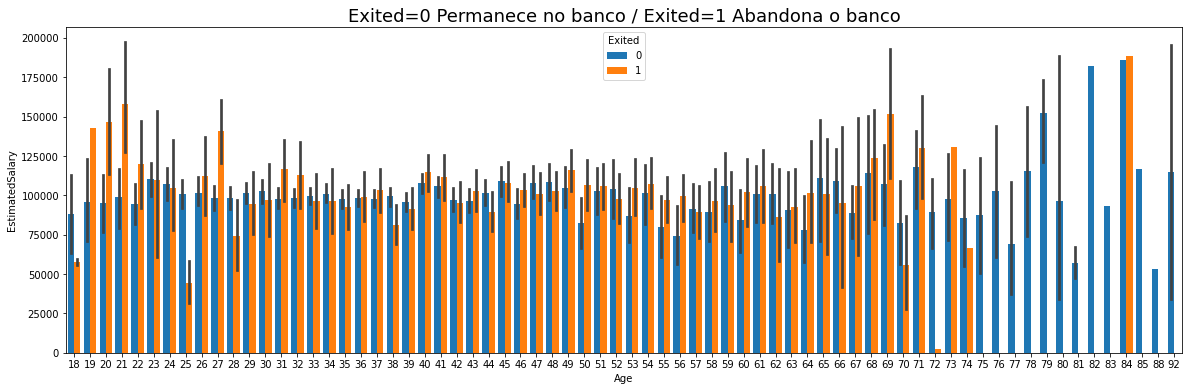

In [0]:
rcParams['figure.figsize'] = 20,6
sns.barplot(x="Age", y="EstimatedSalary", data=df, hue='Exited', saturation=2)
plt.title("Exited=0 Permanece no banco / Exited=1 Abandona o banco", size=18)

**Separando a base de dados em atributos previsores e de teste / Separating the database into predictive and test attributes**

In [0]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

**Codificando dados categóricos / Encoding categorical data**

In [0]:
label_E = LabelEncoder()
X[:, 2] = label_E.fit_transform(X[:, 2])

col_Transf = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(col_Transf.fit_transform(X))


**Colocando os registros na mesma escala / Putting the records on the same scale**

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


**Dividindo o conjunto de dados em conjunto de treinamento e de teste / Splitting the dataset into the Training set and Test set**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


**Inicializando o modelo com Keras / Initializing the Keras model**

In [0]:
modelo = tf.keras.models.Sequential()

**Adicionando a camada de entrada e a primeira camada oculta / Adding the input layer and the first hidden layer**

In [0]:
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adicionando a segunda camada oculta / Adding the second hidden layer**

In [0]:
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adicionando a camada de saída / Adding the output layer**

In [0]:
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Compilando o modelo / compile the keras model**

In [0]:
history=modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Treinando o modelo / Training the model**

In [0]:

modelo.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.6859
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8066
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8141
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8200
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8235
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8251
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8261
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8307
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3820 - accura

**Fazendo as previsões e avaliando o modelo / Making the predictions and evaluating the model**

In [0]:
prev = modelo.predict(X_test)
prev = (prev > 0.5)
conf_mat = confusion_matrix(y_test, prev)
print(conf_mat)

[[1507   88]
 [ 196  209]]


**Previsão da acurácia do modelo / Prediction of model accuracy**

In [0]:
acc = accuracy_score(y_test, prev)
print("A acurácia do modelo é de", acc*100,'%')

A acurácia do modelo é de 85.8 %


**Inserindo novos dados para realizar a previsão / Inserting new data to perform the forecast**

In [0]:
new_data_input = [[0.9972039090469509, -0.5787359118285802, -0.5738091541336481, -1.547140955933878, 0.912419149523028, 0.4842246042993514, -0.3502038645510443, 1.0508202865849046, 0.8077365626180174, -1.5477679860172207, 0.970242550937133, -0.4373288460949041]]

In [0]:
new_data_output = modelo.predict(new_data_input )
print( "%.f" % new_data_output)
if new_data_input=='0':
      print('Cliente permanecerá no banco')
else: 
      print('Cuidado, o cliente encerrará sua conta no banco!!!')


0
Cuidado, o cliente encerrará sua conta no banco!!!
